 computer and mathematical, business and financial operations, and architecture and engineering.: 'Seattle-Bellevue-Everett, WA Metropolitan Division',
 healthcare support, educational instruction and library, and business and financial operations: 'New York City Metropolitan Area',
 healthcare support; arts, design, entertainment, sports, and media; and management: 'Los Angeles Metropolitan Area',
transportation and material moving, management, and production. : 'Chicago Metropolitan Area',
transportation and material moving, office and administrative support, and computer and mathematical: 'Dallas-Fort Worth Metropolitan Area',
computer and mathematical, management, and business and financial operations: 'San Francisco Bay Area'

In [11]:
import pandas as pd

files = ['oesm18all.all_data_M_2018.xlsx', 'oesm19all.all_data_M_2018.xlsx', 
         'oesm20all.all_data_M_2020.xlsx', 'oesm21all.all_data_M_2021.xlsx', 
         'oesm22all.all_data_M_2022.xlsx']


data_all_years = []

for file in files:

    data = pd.read_excel(f'/Users/loricai/Downloads/Chrome download/{file}')

    data = data[data['occ_code'] == '15-0000'] 

    data_all_years.append(data)

data_all_years = pd.concat(data_all_years)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/loricai/Downloads/Chrome download/oesm18all.all_data_M_2018.xlsx'

In [ ]:
import pandas as pd
files = ['all_data_M_2018x.xlsx', 'all_data_M_2019x.xlsx', 
         'all_data_M_2020x.xlsx', 'all_data_M_2021x.xlsx', 
         'all_data_M_2022x.xlsx']

data_all_years = []

for file in files:

    data = pd.read_excel(f'{file}')

    data = data[data['occ_code'] == '15-0000'] 
    data_all_years.append(data)

data_all_years = pd.concat(data_all_years)


In [12]:
import pandas as pd
import json

files = ['all_data_M_2018x.xlsx', 'all_data_M_2019x.xlsx', 
         'all_data_M_2020x.xlsx', 'all_data_M_2021x.xlsx', 
         'all_data_M_2022x.xlsx']

for file in files:
    data = pd.read_excel(f'/Users/loricai/Desktop/{file}')
    data.to_json(f'/Users/loricai/Desktop/{file}.json', orient='records')

data_all_years = []

for file in files:
    with open(f'/Users/loricai/Desktop/{file}.json') as json_file:
        data = json.load(json_file)

    data = pd.DataFrame(data)
    

    data = data[data['OCC_CODE'] == '15-0000']  #
    data_all_years.append(data)

data_all_years = pd.concat(data_all_years)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/loricai/Desktop/all_data_M_2018x.xlsx'

In [ ]:

import matplotlib.pyplot as plt


data_all_years.set_index('year', inplace=True)

data_all_years['TOT_EMP'].plot(kind='line')

plt.title('Employment of Business and Financial Operations Occupations (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Employees')

plt.show()


In [ ]:
import pandas as pd
import json

files =['all_data_M_2018x.xlsx', 'all_data_M_2019x.xlsx', 
         'all_data_M_2020x.xlsx', 'all_data_M_2021x.xlsx', 
         'all_data_M_2022x.xlsx']


for file in files:
    data = pd.read_excel(f'/Users/loricai/Desktop/{file}')
    data = data[data['occ_code'] == '15-0000'] 
 
    data = data[['tot_emp']]
    data['year'] = file[-8:-4] 
    
    data.to_json(f'/Users/loricai/Desktop/processed_{file}.json', orient='records')



In [ ]:
print(data.columns)


In [ ]:
data = pd.read_excel('/Users/loricai/Desktop/all_data_M_2018x.xlsx')
print(data.columns)


In [ ]:
import pandas as pd
import json

files = ['all_data_M_2018x.xlsx', 'all_data_M_2019x.xlsx', 
         'all_data_M_2020x.xlsx', 'all_data_M_2021x.xlsx', 
         'all_data_M_2022x.xlsx']

years = ['2018', '2019', '2020', '2021', '2022']

result = {}

for file, year in zip(files, years):
    data = pd.read_excel(f'/Users/loricai/Desktop/{file}')
    
    if 'occ_code' in data.columns:
        data = data[data['occ_code'] == '15-0000'] 
        if 'tot_emp' in data.columns:
            data = data[['tot_emp']]
            data['year'] = year
            result[year] = int(data['tot_emp'])
        else:
            print(f"Column 'tot_emp' not found in file {file}.")
    else:
        print(f"Column 'occ_code' not found in file {file}.")

with open('/Users/loricai/Desktop/employment.json', 'w') as fp:
    json.dump(result, fp)


In [3]:
import pandas as pd
import json
df = pd.read_excel('all_data_M_2018x.xlsx')
filtered_df = df[df['occ_code'] == '15-0000']
tot_emp_value = filtered_df['tot_emp'].values[0]
with open('output.json', 'w') as f:
    json.dump({'tot_emp': tot_emp_value}, f)


In [7]:
import pandas as pd
import json
import re

files = ['all_data_M_2018x.xlsx', 'all_data_M_2019x.xlsx', 
         'all_data_M_2020x.xlsx', 'all_data_M_2021x.xlsx', 
         'all_data_M_2022x.xlsx']

data = {}

for filename in files:
    year = re.search(r'(\d{4})', filename).group(1)

    df = pd.read_excel(filename)
    filtered_df = df[df['occ_title'] == 'Computer and Mathematical Occupations']
    tot_emp_value = filtered_df['tot_emp'].values[0]

    data[year] = tot_emp_value

with open('output.json', 'w') as f:
    json.dump(data, f)



KeyError: 'occ_title'

In [1]:
import pandas as pd
import json
import re

filename = 'all_data_M_2018x.xlsx'

year = re.search(r'(\d{4})', filename).group(1)

df = pd.read_excel(filename)
filtered_df = df[df['occ_title'] == 'Computer and Mathematical Occupations']
tot_emp_value = filtered_df['tot_emp'].values[0]

with open('output.json', 'w') as f:
    json.dump({year: tot_emp_value}, f)

FileNotFoundError: [Errno 2] No such file or directory: 'all_data_M_2018x.xlsx'

In [2]:
import pandas as pd
import json
import re

filename = 'all_data_M_2019x.xlsx'

year = re.search(r'(\d{4})', filename).group(1)

df = pd.read_excel(filename)
filtered_df = df[df['occ_code'] == '15-0000']
tot_emp_value = filtered_df['tot_emp'].values[0]

with open('output.json', 'r') as f:
    data = json.load(f)

data[year] = tot_emp_value

with open('output.json', 'w') as f:
    json.dump(data, f)


FileNotFoundError: [Errno 2] No such file or directory: 'all_data_M_2019x.xlsx'

In [3]:
import pandas as pd
import json
import re

filename = 'all_data_M_2020x.xlsx'

year = re.search(r'(\d{4})', filename).group(1)

df = pd.read_excel(filename)
filtered_df = df[df['OCC_CODE'] == '15-0000']
tot_emp_value = filtered_df['tot_emp'].values[0]

with open('output.json', 'r') as f:
    data = json.load(f)

data[year] = tot_emp_value

with open('output.json', 'w') as f:
    json.dump(data, f)

FileNotFoundError: [Errno 2] No such file or directory: 'all_data_M_2020x.xlsx'

In [4]:
import pandas as pd
import json
import re

filename = 'all_data_M_2021x.xlsx'

year = re.search(r'(\d{4})', filename).group(1)

df = pd.read_excel(filename)
filtered_df = df[df['occ_code'] == '15-0000']
tot_emp_value = filtered_df['tot_emp'].values[0]

with open('output.json', 'r') as f:
    data = json.load(f)

data[year] = tot_emp_value

with open('output.json', 'w') as f:
    json.dump(data, f)

FileNotFoundError: [Errno 2] No such file or directory: 'all_data_M_2021x.xlsx'

In [5]:
import pandas as pd
import json
import re

filename = 'all_data_M_2022x.xlsx'

year = re.search(r'(\d{4})', filename).group(1)

df = pd.read_excel(filename)
filtered_df = df[df['occ_code'] == '15-0000']
tot_emp_value = filtered_df['tot_emp'].values[0]

with open('output.json', 'r') as f:
    data = json.load(f)

data[year] = tot_emp_value

with open('output.json', 'w') as f:
    json.dump(data, f)

FileNotFoundError: [Errno 2] No such file or directory: 'all_data_M_2022x.xlsx'

In [6]:
import pandas as pd
import json
import re

files = ['all_data_M_2018x.xlsx', 'all_data_M_2019x.xlsx', 
         'all_data_M_2020x.xlsx', 'all_data_M_2021x.xlsx', 
         'all_data_M_2022x.xlsx']

data = {}

for filename in files:
    year = re.search(r'(\d{4})', filename).group(1)

    df = pd.read_excel(filename)
    df['occ_code'] = df['occ_code'].str.lower()

    filtered_df = df[df['occ_code'] == '15-0000']
    df['tot_emp'] = df['tot_emp'].str.lower()
    tot_emp_value = filtered_df['tot_emp'].values[0]

    data[year] = tot_emp_value

    with open('output.json', 'w') as f:
    json.dump(data, f)


FileNotFoundError: [Errno 2] No such file or directory: 'all_data_M_2018x.xlsx'

In [19]:
import pandas as pd
import json
import re

files = ['all_data_M_2018x.xlsx', 'all_data_M_2019x.xlsx', 
         'all_data_M_2020x.xlsx', 'all_data_M_2021x.xlsx', 
         'all_data_M_2022x.xlsx']

data = {}

for filename in files:
    year = re.search(r'(\d{4})', filename).group(1)

    df = pd.read_excel(filename)
    df['OCC_CODE'] = df['OCC_CODE'].str.lower()

    filtered_df = df[df['OCC_CODE'] == '15-0000']
    tot_emp_value = filtered_df['tot_emp'].values[0]

    data[year] = tot_emp_value

with open('output.json', 'w') as f:
    json.dump(data, f)

    

KeyError: 'OCC_CODE'

In [7]:
import pandas as pd
import json
import re

files = ['national_M2018_dl.xlsx', 'national_M2019_dl.xlsx', 
         'national_M2020_dl.xlsx', 'national_M2021_dl.xlsx', 
         'national_M2022_dl.xlsx']

data = {}

for filename in files:
    year = re.search(r'(\d{4})', filename).group(1)

    df = pd.read_excel(filename)
    df['OCC_CODE'] = df['OCC_CODE'].str.lower()

    filtered_df = df[df['OCC_CODE'] == '15-0000']
    tot_emp_value = filtered_df['TOT_EMP'].values[0]

    data[year] = tot_emp_value

with open('national_Computer and Mathematical Occupations_EMP.json', 'w') as f:
    json.dump(data, f)


KeyError: 'OCC_CODE'

In [17]:
import pandas as pd
import json
import re

files = ['all_data_M_2018x.xlsx', 'all_data_M_2019x.xlsx', 
         'all_data_M_2020x.xlsx', 'all_data_M_2021x.xlsx', 
         'all_data_M_2022x.xlsx']

data = {}

for filename in files:
    year = re.search(r'(\d{4})', filename).group(1)

    df = pd.read_excel(filename)
    filtered_df = df[df['occ_code'] == '15-0000']
    tot_emp_value = filtered_df['tot_emp'].values[0]

    data[year] = tot_emp_value

with open('national_Computer and Mathematical Occupations_EMP.json', 'w') as f:
    json.dump(data, f)


FileNotFoundError: [Errno 2] No such file or directory: 'all_data_M_2018x.xlsx'

Because of those illogical bug, I decided to preprocess the data using Excel and then use pandas and matplot

In [18]:
import pandas as pd

df = pd.read_excel('national_industry_emp_18-22.xlsx')

filtered_df = df[df['OCC_TITLE'].str.contains('computer', case=False) & df['OCC_TITLE'].str.contains('mathematical', case=False)]

filtered_df = filtered_df[['YEAR', 'OCC_CODE', 'OCC_TITLE', 'TOT_EMP']]

filtered_df.to_json('national_industry_emp_computer and mathematical.json', orient='records')


In [19]:
import pandas as pd

df = pd.read_excel('national_industry_emp_18-22.xlsx')

filtered_df = df[df['OCC_TITLE'].str.contains('computer', case=False) & df['OCC_TITLE'].str.contains('mathematical', case=False)]

filtered_df = filtered_df[['YEAR', 'OCC_CODE', 'OCC_TITLE', 'TOT_EMP']]

filtered_df['YEAR'] = filtered_df['YEAR'].astype(int)

filtered_df.to_json('national_industry_emp_computer and mathematical.json', orient='records')

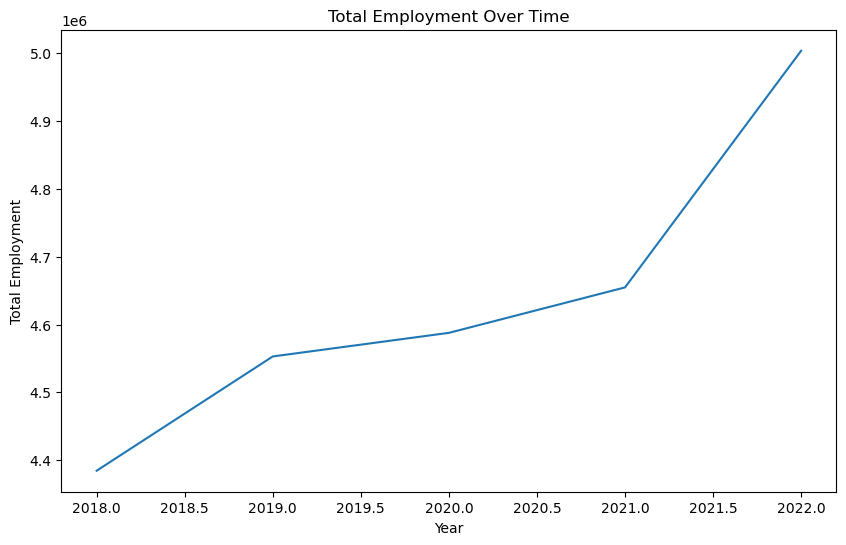

In [20]:
grouped_df = filtered_df.groupby('YEAR')['TOT_EMP'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(grouped_df['YEAR'], grouped_df['TOT_EMP'])

plt.title('Total Employment Over Time')
plt.xlabel('Year')
plt.ylabel('Total Employment')

plt.show()


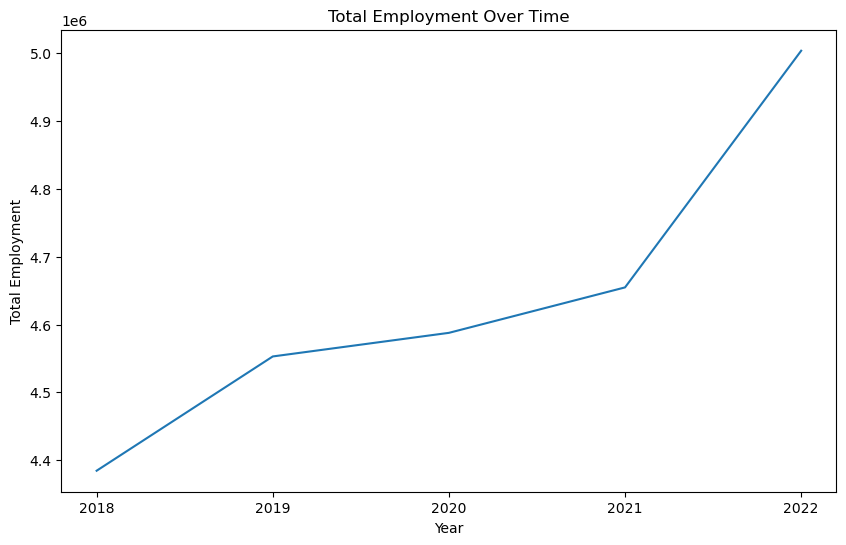

In [12]:
import matplotlib.pyplot as plt
import numpy as np

grouped_df = filtered_df.groupby('YEAR')['TOT_EMP'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(grouped_df['YEAR'], grouped_df['TOT_EMP'])

plt.xticks(np.arange(min(grouped_df['YEAR']), max(grouped_df['YEAR'])+1, 1))

plt.title('Total Employment Over Time')
plt.xlabel('Year')
plt.ylabel('Total Employment')

plt.show()


ValueError: min() arg is an empty sequence

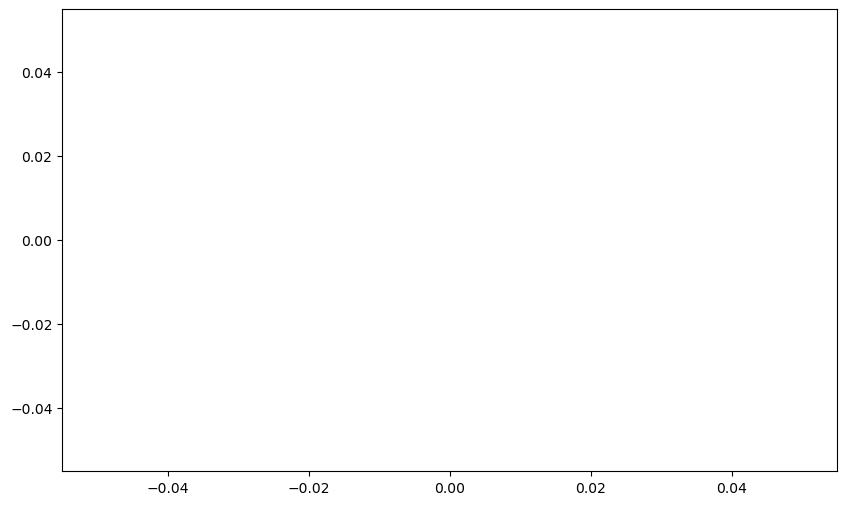

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

OCC_TITLEs = ["computer and mathematical", "business and financial operations", "architecture and engineering", "healthcare support", 
              "educational instruction and library", "arts, design, entertainment, sports, and media", "management", 
              "transportation and material moving", "production", "office and administrative support"]

df = pd.read_excel('national_industry_emp_18-22.xlsx')

filtered_df = df[df['OCC_TITLE'].isin(OCC_TITLEs)]

filtered_df = filtered_df[['YEAR', 'OCC_CODE', 'OCC_TITLE', 'TOT_EMP']]
filtered_df['YEAR'] = filtered_df['YEAR'].astype(int)
grouped_df = filtered_df.groupby(['YEAR', 'OCC_TITLE'])['TOT_EMP'].sum().reset_index()

plt.figure(figsize=(10, 6))

for title in OCC_TITLEs:
    data = grouped_df[grouped_df['OCC_TITLE'] == title]
    plt.plot(data['YEAR'], data['TOT_EMP'], label=title)

plt.xticks(np.arange(min(grouped_df['YEAR']), max(grouped_df['YEAR'])+1, 1))

plt.legend()

plt.title('Total Employment Over Time')
plt.xlabel('Year')
plt.ylabel('Total Employment')

plt.show()


In [ ]:
import pandas as pd

df = pd.read_excel('national_industry_emp_18-22.xlsx')

filtered_df = df[(df['OCC_TITLE'].str.contains('computer', case=False) & df['OCC_TITLE'].str.contains('mathematical', case=False)) |
                 (df['OCC_TITLE'].str.contains('business', case=False) & df['OCC_TITLE'].str.contains('financial operations', case=False))|
                 (df['OCC_TITLE'].str.contains('architecture', case=False) & df['OCC_TITLE'].str.contains('engineering', case=False))|
                 (df['OCC_TITLE'].str.contains('healthcare', case=False) & df['OCC_TITLE'].str.contains('support', case=False))|
                 (df['OCC_TITLE'].str.contains('educational instruction', case=False) & df['OCC_TITLE'].str.contains('library', case=False))|
                 (df['OCC_TITLE'].str.contains('arts, design, entertainment, sports', case=False) & df['OCC_TITLE'].str.contains('media', case=False))|
                 (df['OCC_TITLE'].str.contains('management', case=False))|
                 (df['OCC_TITLE'].str.contains('transportation', case=False) & df['OCC_TITLE'].str.contains('material moving', case=False))|
                 (df['OCC_TITLE'].str.contains('production', case=False))|
                 (df['OCC_TITLE'].str.contains('office', case=False) & df['OCC_TITLE'].str.contains('administrative support', case=False))]
filtered_df = filtered_df[['YEAR', 'OCC_CODE', 'OCC_TITLE', 'TOT_EMP']]

filtered_df['YEAR'] = filtered_df['YEAR'].astype(int)

filtered_df.to_json('national_industry_emp_main industry.json', orient='records')

print(filtered_df)

In [ ]:
import matplotlib.pyplot as plt

occ_titles = filtered_df['OCC_TITLE'].unique()

plt.figure(figsize=(10,6))

for title in occ_titles:
    df_title = filtered_df[filtered_df['OCC_TITLE'] == title]
    plt.plot(df_title['YEAR'], df_title['TOT_EMP'], label=title)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Total Employment from 2018 to 2022')
plt.xlabel('Year')
plt.ylabel('Total Employment')

plt.show()


Looks so messy!

In [6]:
import pandas as pd
import json

with open('national_industry_emp_main industry.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)

df = df.groupby(['OCC_TITLE', 'YEAR'], as_index=False)['TOT_EMP'].sum()

pivot_df = df.pivot(index='OCC_TITLE', columns='YEAR', values='TOT_EMP')

pivot_df['Difference'] = pivot_df[2022] - pivot_df[2018]

max_diff_occ_title = pivot_df['Difference'].idxmax()
min_diff_occ_title = pivot_df['Difference'].idxmin()

output_data = df[(df['OCC_TITLE'] == max_diff_occ_title) | (df['OCC_TITLE'] == min_diff_occ_title)]

max_diff = pivot_df.loc[max_diff_occ_title, 'Difference']
min_diff = pivot_df.loc[min_diff_occ_title, 'Difference']

print("Max difference OCC_TITLE:", max_diff_occ_title, "Difference:", max_diff)
print("Min difference OCC_TITLE:", min_diff_occ_title, "Difference:", min_diff)
print(output_data)


Max difference OCC_TITLE: Transportation and Material Moving Occupations Difference: 3316200.0
Min difference OCC_TITLE: Office and Administrative Support Occupations Difference: -3154220.0
                                          OCC_TITLE  YEAR   TOT_EMP
113   Office and Administrative Support Occupations  2018  21828990
114   Office and Administrative Support Occupations  2019  19528250
115   Office and Administrative Support Occupations  2020  18548360
116   Office and Administrative Support Occupations  2021  18299380
117   Office and Administrative Support Occupations  2022  18674770
181  Transportation and Material Moving Occupations  2018  10244260
182  Transportation and Material Moving Occupations  2019  12532030
183  Transportation and Material Moving Occupations  2020  12163360
184  Transportation and Material Moving Occupations  2021  12639920
185  Transportation and Material Moving Occupations  2022  13560460


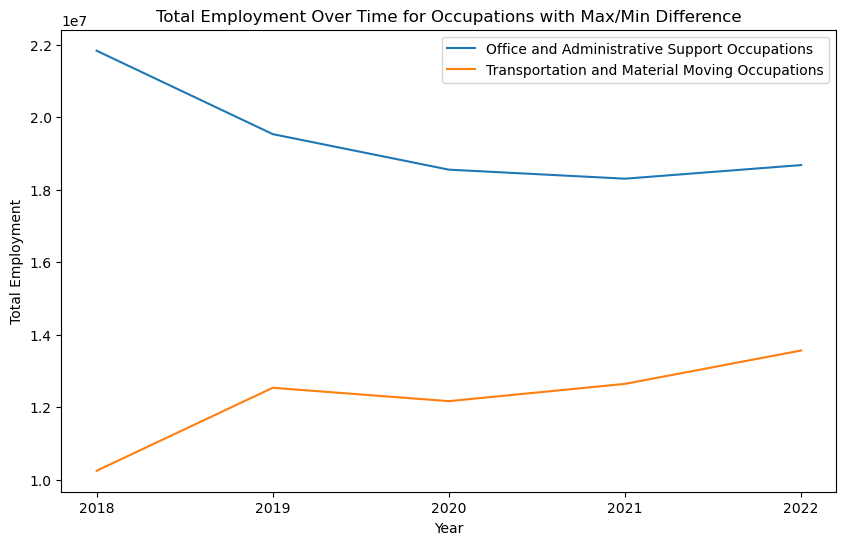

In [7]:

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
for title, group in output_data.groupby('OCC_TITLE'):
    plt.plot(group['YEAR'], group['TOT_EMP'], label=title)

plt.xticks(np.arange(output_data['YEAR'].min(), output_data['YEAR'].max() + 1, 1))  # This line sets xticks to integers
plt.xlabel('Year')
plt.ylabel('Total Employment')
plt.title('Total Employment Over Time for Occupations with Max/Min Difference')
plt.legend()
plt.show()


OCC_TITLE with largest TOT_EMP in 2022: Office and Administrative Support Occupations
OCC_TITLE with smallest TOT_EMP in 2022: Farm and Home Management Educators
                                         OCC_TITLE  YEAR   TOT_EMP
113  Office and Administrative Support Occupations  2018  21828990
114  Office and Administrative Support Occupations  2019  19528250
115  Office and Administrative Support Occupations  2020  18548360
116  Office and Administrative Support Occupations  2021  18299380
117  Office and Administrative Support Occupations  2022  18674770
                             OCC_TITLE  YEAR  TOT_EMP
39  Farm and Home Management Educators  2019    17440
40  Farm and Home Management Educators  2020    16180
41  Farm and Home Management Educators  2021    21240
42  Farm and Home Management Educators  2022    16440


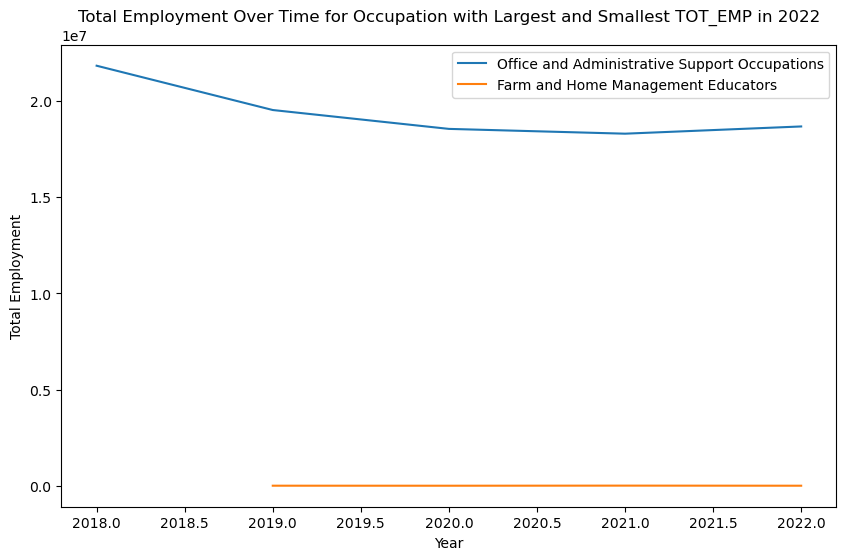

In [8]:
max_tot_emp_occ_title_2022 = pivot_df[2022].idxmax()
min_tot_emp_occ_title_2022 = pivot_df[2022].idxmin()

output_data_max_2022 = df[df['OCC_TITLE'] == max_tot_emp_occ_title_2022]
output_data_min_2022 = df[df['OCC_TITLE'] == min_tot_emp_occ_title_2022]

print("OCC_TITLE with largest TOT_EMP in 2022:", max_tot_emp_occ_title_2022)
print("OCC_TITLE with smallest TOT_EMP in 2022:", min_tot_emp_occ_title_2022)
print(output_data_max_2022)
print(output_data_min_2022)

plt.figure(figsize=(10, 6))
plt.plot(output_data_max_2022['YEAR'], output_data_max_2022['TOT_EMP'], label=max_tot_emp_occ_title_2022)
plt.plot(output_data_min_2022['YEAR'], output_data_min_2022['TOT_EMP'], label=min_tot_emp_occ_title_2022)

plt.xlabel('Year')
plt.ylabel('Total Employment')
plt.title('Total Employment Over Time for Occupation with Largest and Smallest TOT_EMP in 2022')
plt.legend()
plt.show()

In [9]:
pivot_df['Average'] = pivot_df.mean(axis=1)

max_avg_occ_title = pivot_df['Average'].idxmax()
min_avg_occ_title = pivot_df['Average'].idxmin()

output_data_max_avg = df[df['OCC_TITLE'] == max_avg_occ_title]
output_data_min_avg = df[df['OCC_TITLE'] == min_avg_occ_title]

print("OCC_TITLE with largest average TOT_EMP over 2018-2022:", max_avg_occ_title)
print("OCC_TITLE with smallest average TOT_EMP over 2018-2022:", min_avg_occ_title)
print(output_data_max_avg)
print(output_data_min_avg)


OCC_TITLE with largest average TOT_EMP over 2018-2022: Office and Administrative Support Occupations
OCC_TITLE with smallest average TOT_EMP over 2018-2022: Farm and Home Management Advisors
                                         OCC_TITLE  YEAR   TOT_EMP
113  Office and Administrative Support Occupations  2018  21828990
114  Office and Administrative Support Occupations  2019  19528250
115  Office and Administrative Support Occupations  2020  18548360
116  Office and Administrative Support Occupations  2021  18299380
117  Office and Administrative Support Occupations  2022  18674770
                            OCC_TITLE  YEAR  TOT_EMP
38  Farm and Home Management Advisors  2018    16040


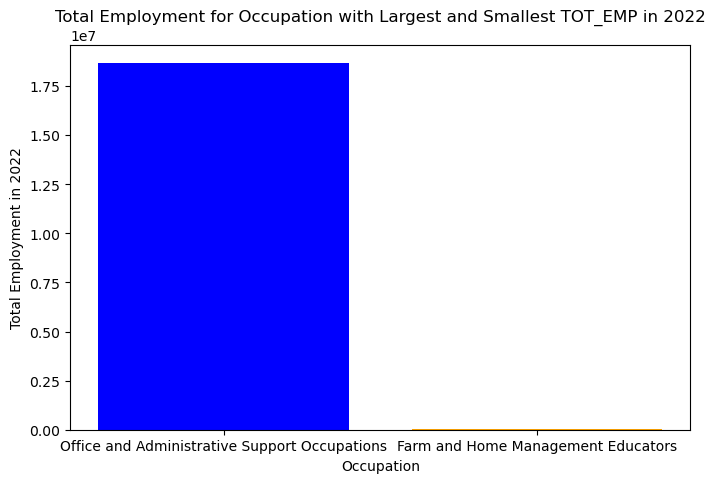

In [10]:
max_tot_emp_2022 = output_data_max_2022[output_data_max_2022['YEAR'] == 2022]['TOT_EMP'].values[0]
min_tot_emp_2022 = output_data_min_2022[output_data_min_2022['YEAR'] == 2022]['TOT_EMP'].values[0]

occ_titles = [max_tot_emp_occ_title_2022, min_tot_emp_occ_title_2022]
tot_emp_2022 = [max_tot_emp_2022, min_tot_emp_2022]

plt.figure(figsize=(8, 5))
plt.bar(occ_titles, tot_emp_2022, color=['blue', 'orange'])
plt.xlabel('Occupation')
plt.ylabel('Total Employment in 2022')
plt.title('Total Employment for Occupation with Largest and Smallest TOT_EMP in 2022')
plt.show()
